# Gradient Tree Boosting

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from src.gradboost import GradBoost
import src.utils as utils

In [2]:
df = pd.read_csv("data/diamonds.csv")
X_train, X_test, y_train, y_test = utils.preprocessing_LOS(df)

In [3]:
param_grid = {
	"learning_rate": [0.01, 0.1, 0.5, 1.0],
	"subsample": [0.5, 0.75, 1.0],
	"criterion": ["friedman_mse", "squared_error"],
}

random_search = RandomizedSearchCV(GradBoost(loss="log_loss"), param_grid, cv=5, scoring="accuracy", 
								 return_train_score=True, verbose=10, n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradBoost(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'subsample': [0.5, 0.75, 1.0]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [4]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True, key=lambda x: x[0])

[(0.7853498286340155,
  {'subsample': 1.0, 'learning_rate': 0.5, 'criterion': 'squared_error'}),
 (0.7628044408669554,
  {'subsample': 1.0, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}),
 (0.7604934688980696,
  {'subsample': 0.5, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}),
 (0.7599559934188356,
  {'subsample': 0.5, 'learning_rate': 0.1, 'criterion': 'squared_error'}),
 (0.7442895198167003,
  {'subsample': 1.0, 'learning_rate': 1.0, 'criterion': 'friedman_mse'}),
 (0.7381361376109963,
  {'subsample': 0.75, 'learning_rate': 1.0, 'criterion': 'friedman_mse'}),
 (0.7345892096244275,
  {'subsample': 0.5, 'learning_rate': 0.01, 'criterion': 'squared_error'}),
 (0.7341861716184452,
  {'subsample': 0.75, 'learning_rate': 0.01, 'criterion': 'squared_error'}),
 (0.7341593007330495,
  {'subsample': 0.75, 'learning_rate': 0.01, 'criterion': 'friedman_mse'}),
 (0.7339174699859035,
  {'subsample': 1.0, 'learning_rate': 0.01, 'criterion': 'friedman_mse'})]

The best accuracy is given by a `learning_rate` of 0.5, but 0.1 also yield good results with a `subsample` lower than 1, so we believe that the accuracy that a `learning_rate` of 0.1 can achieve with the full training set (`subsample` = 1.0) is higher than of 0.5. To make sure, we will to a randomized search for the `max_depth` trying both 0.5 and 0.1 `learning_rate`s.

In [5]:
param_grid = {
	"max_depth": list(range(3, 14)),
}

random_search = RandomizedSearchCV(GradBoost(learning_rate=0.5, criterion="squared_error"), param_grid, cv=5, scoring="accuracy", 
								   return_train_score=True, verbose=10, n_iter=5, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=GradBoost(criterion='squared_error',
                                       learning_rate=0.5),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [6]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True, key=lambda x: x[0])

[(0.7914761955260229, {'max_depth': 12}),
 (0.7867468547036488, {'max_depth': 4}),
 (0.7838986311193955, {'max_depth': 9}),
 (0.7690653391106098, {'max_depth': 7}),
 (0.7597414235134979, {'max_depth': 8})]

In [3]:
model = GradBoost(learning_rate=0.5,
				  n_estimators=100,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=12)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

{'accuracy': 0.7825915196207532,
 'precision': 0.7333605267016932,
 'recall': 0.7380507582730944,
 'f1': 0.7335868352318363}

In [8]:
param_grid = {
	"max_depth": list(range(3, 14)),
}

random_search = RandomizedSearchCV(GradBoost(learning_rate=0.1, criterion="squared_error"), param_grid, cv=5, scoring="accuracy", 
								   return_train_score=True, verbose=10, n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradBoost(criterion='squared_error'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [9]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True, key=lambda x: x[0])

[(0.795802584999395, {'max_depth': 7}),
 (0.7955607723057866, {'max_depth': 9}),
 (0.7949426913917808, {'max_depth': 10}),
 (0.7934647493665283, {'max_depth': 11}),
 (0.7930080526360277, {'max_depth': 13}),
 (0.7923362118976929, {'max_depth': 6}),
 (0.7923093012945144, {'max_depth': 12}),
 (0.7871231229240462, {'max_depth': 5}),
 (0.7780405650713947, {'max_depth': 4}),
 (0.7628044408669554, {'max_depth': 3})]

This time the best max_depth is around 8. We will take 7, which its accuracy is very similar and it's less computationally expensive.

In [4]:
model = GradBoost(learning_rate=0.1,
				  n_estimators=100,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

{'accuracy': 0.7887806162760074,
 'precision': 0.7491497376880488,
 'recall': 0.740191150932886,
 'f1': 0.7423138648010774}

In [5]:
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.2min remaining:   46.5s


Cross validation (accuracy) scores:
	mean: 0.7945746642085857 std: 0.004104621921666219


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


We confirm that `learning_rate` of 0.1 not only achieved a slightly higher accuracy than 0.5, but the `max_depth` is also lower, which means the model is simpler and more efficient.

Now we will check if incerasing `n_estimators` increases the metrics.

In [6]:
model0 = GradBoost(learning_rate=0.1,
				  n_estimators=200,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model0.fit(X_train2, y_train2)
model0.compute_metrics(X_val, y_val)

{'accuracy': 0.7918093231498552,
 'precision': 0.7563380978759194,
 'recall': 0.7478058411237646,
 'f1': 0.7506304055697862}

In [7]:
model0.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.3min remaining:  1.6min


Cross validation (accuracy) scores:
	mean: 0.7973926784303397 std: 0.0029298781111768927


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


In [8]:
model0 = GradBoost(learning_rate=0.1,
				  n_estimators=400,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model0.fit(X_train2, y_train2)
model0.compute_metrics(X_val, y_val)

{'accuracy': 0.7923360547800895,
 'precision': 0.77476248512012,
 'recall': 0.7578611600586778,
 'f1': 0.7650665824884917}

They were vaguely increased, but the complexity and time taken also increased. We will take 200 estimators that is an intermediate value between 100 (faster) and 400 (better performance).

### With outliers

In [9]:
X_train, X_test, y_train, y_test = utils.preprocessing_LS(df)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = GradBoost(criterion="squared_error", max_depth=7)
model.cross_validation(X_train, y_train, 5, 0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.3min remaining:   52.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


Cross validation (accuracy) scores:
	mean: 0.7915421156297068 std: 0.006317752826481675


In [10]:
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

{'accuracy': 0.7793998377939984,
 'precision': 0.790740116317227,
 'recall': 0.7613960829007962,
 'f1': 0.7730954675898041}

Same as with Random Forest and AdaBoost, if Gradient Boosting could generalize well with outliers, we will keep them for this model.

### Final test

In [12]:
X_train, X_test, y_train, y_test = utils.preprocessing_LS(df)
model1 = GradBoost(criterion="squared_error", max_depth=7, n_estimators=200)
model1.fit(X_train, y_train)
model1.compute_metrics(X_test, y_test)

{'accuracy': 0.7756766777901372,
 'precision': 0.7858117356823728,
 'recall': 0.7466386097475655,
 'f1': 0.762930955113528}

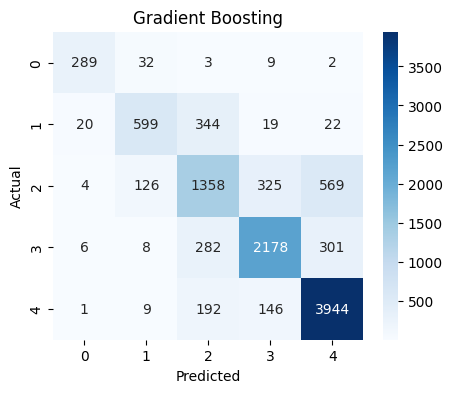

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = model1.conf_matrix(X_test, y_test)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

We observe that class 1 is highly missinterpreted by the model as class 2. And there's still some confusion on predicting class 2.  
So now we will compare the Gradient Boosting model to a Random Forest.

In [14]:
from src.randomforest import RandomForest
model2 = RandomForest(n_estimators=100, max_depth=16, bootstrap=True, class_weight="balanced")
model2.fit(X_train, y_train)
diff = model1.compare(model2, X_test, y_test)

accuracy 0.022061549870226127
precision 0.02107766119628618
recall 0.016038995141268608
f1 0.025774680844287468
confusion matrix [[  -2    1    2    0   -1]
 [   3  -45   89  -41   -6]
 [   1  -43  450 -390  -18]
 [   6  -40  202 -153  -15]
 [   0   -5   81  -64  -12]]


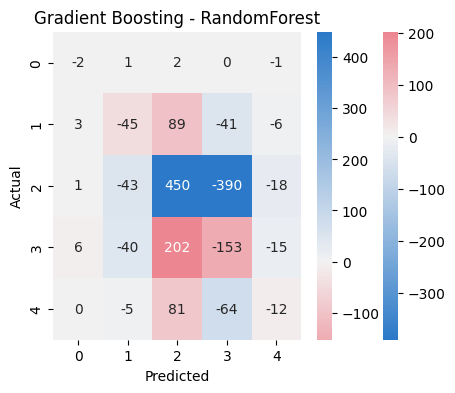

In [15]:
import numpy as np

conf_mat_diff = diff["confusion matrix"]

mask = np.eye(conf_mat_diff.shape[0], dtype=bool)
cmap_diag = sns.diverging_palette(250, 10, s=90, l=50, as_cmap=True)
cmap_offdiag = sns.diverging_palette(10, 250, s=90, l=50, as_cmap=True)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_diff, mask=mask, annot=True, fmt="d", cmap=cmap_diag, center=0)
sns.heatmap(conf_mat_diff, mask=~mask, annot=True, fmt="d", cmap=cmap_offdiag, center=0)
plt.title("Gradient Boosting - RandomForest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

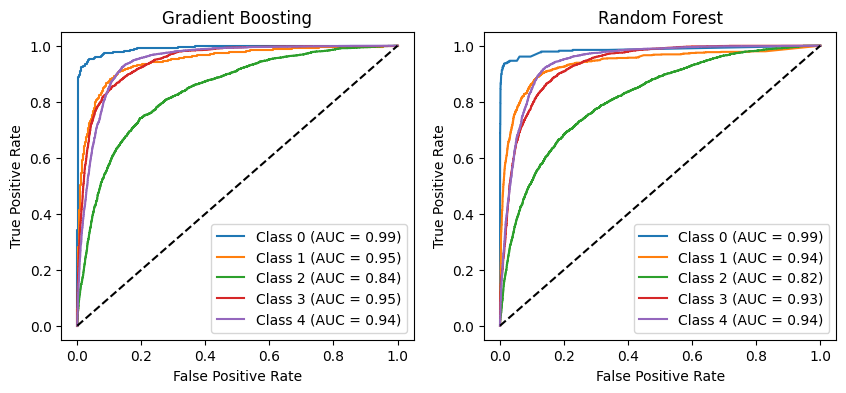

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
model1.roc_curve(X_test, y_test, ax[0], "Gradient Boosting")
model2.roc_curve(X_test, y_test, ax[1], "Random Forest")
plt.show()

By only looking at the metrics, Gradient Boosting seems to outperform Random Forest, but by looking at the difference confusion matrix, that compares the Gradient Boosting model with the Random Forest, we observe that, similar to AdaBoost, Gradient Boosting predicts class 2 more often that it should, gaining precision on it but loosing it with other classes.  
The AUC metrics confirms us that the performance on class 2 slightly improves, but is still much inferior to the others.  
This model is less complex in terms of `max_depth` (7 vs 16), but still, Random Forest seems to generalize better to the overall distribution of classes.